In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
data=pd.read_csv("earthquakes.csv")
data.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


## DATA PREPROCESSING

In [41]:
# Dropping 'id', 'url', 'detailUrl', 'types', and 'geometry type' as they do not provide direct information relevant to predicting 'alert' levels.
# These variables mainly serve as identifiers, text descriptions, or metadata, which don't contribute to the predictive features needed for alert classification.

irrelevant_cols = ['id', 'url', 'detailUrl', 'types', 'geometryType']
data_cleaned = data.drop(columns=irrelevant_cols)
data_cleaned.head()

,magnitude,type,title,date,time,updated,felt,cdi,mmi,alert,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,NaN,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [42]:
# Select columns with integer data types and convert them to float data type for more precision in calculations
numeric_cols = data_cleaned.select_dtypes(include=['int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].astype(float)

In [43]:
data_cleaned['alert'] = data_cleaned['alert'].astype(str)
print("Unique values in 'alert':", data_cleaned['alert'].unique())

Unique values in 'alert': ['green' 'nan' 'yellow' 'red' 'orange']


In [44]:
# Step 1: Calculate percentiles using the 'magnitude' column from the cleaned data
percentiles = data_cleaned['magnitude'].quantile([0.25, 0.5, 0.75, 0.9]).values

# Step 2: Function to fill NaN values in the 'alert' column based on 'magnitude'
def impute_alert_based_on_magnitude(row):
    if pd.isna(row['alert']):  # Check if 'alert' is NaN
        if row['magnitude'] >= percentiles[3]:  # Top 10% as Red
            return 'red'
        elif row['magnitude'] >= percentiles[2]:  # Top 25% as Orange
            return 'orange'
        elif row['magnitude'] >= percentiles[1]:  # Median as Yellow
            return 'yellow'
        else:
            return 'green'  # Bottom 50% as Green
    else:
        return row['alert']  # Keep existing 'alert' values

# Step 3: Apply the function to fill NaN 'alert' values in the cleaned DataFrame
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Step 4: Check if there are any remaining NaN values in the cleaned data
print("Number of NaN values in 'alert' in data_cleaned:", data_cleaned['alert'].isna().sum())

# Step 5: Remove duplicates in the cleaned data
data_cleaned = data_cleaned.drop_duplicates()


Number of NaN values in 'alert' in data_cleaned: 0


In [45]:
# Replace the string 'nan' with actual NaN values in the cleaned data
data_cleaned['alert'] = data_cleaned['alert'].replace('nan', pd.NA)

# Re-run the imputation logic on the cleaned data
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Verify that 'nan' strings have been removed and values have been imputed in the cleaned data
print("Updated value counts for 'alert' in data_cleaned:")
print(data_cleaned['alert'].value_counts())


Updated value counts for 'alert' in data_cleaned:
alert
green     760
yellow     30
red         6
orange      4
Name: count, dtype: int64


SCALING

In [46]:
# Selected Predictors from Analysis:
relevant = ['magnitude', 'rms', 'cdi', 'mmi', 'tsunami', 'location', 'placeOnly', 'city', 'alert']
relevant_df = data_cleaned[relevant]

In [47]:
# Feature Scaling numeric variables
relevant_df_num = relevant_df.select_dtypes(include=['int64', 'float64'])
# initializing scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
relevant_df_num_scaled = scaler.fit_transform(relevant_df_num)

relevant_df[relevant_df_num.columns] = relevant_df_num_scaled

### ENCODING

In [48]:
# before encoding
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,alert
0,0.391304,0.190476,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
1,0.456522,0.039683,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
2,0.152174,0.111111,0.444444,0.375,0.0,"Malibu, CA","N of Malibu, CA",Los Angeles,green
3,0.195652,0.039683,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green
4,0.239130,0.103175,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green


In [49]:
# Encoding Categorical Data
relevant_df_cat = relevant_df.select_dtypes(include=['object'])
relevant_df_cat.nunique()

location     270
placeOnly    353
city         167
alert          4
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders

# Step 1: Convert 'alert' to numeric
le = LabelEncoder()
relevant_df['alert_encoded'] = le.fit_transform(relevant_df['alert'])  # Replace 'alert' with numeric values
response = relevant_df['alert_encoded']
target = 'alert_encoded'

# List of categorical columns to encode
categorical_cols = ['location', 'placeOnly', 'city']

import category_encoders as ce

# Applying target encoding with smoothing
target_enc = ce.TargetEncoder(cols=categorical_cols, smoothing=0.5)
relevant_df = target_enc.fit_transform(relevant_df, response)
# Drop the 'alert' column
relevant_df.drop(columns=['alert'], inplace=True)


In [51]:
# after encoding
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,alert_encoded
0,0.391304,0.190476,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0
1,0.456522,0.039683,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0
2,0.152174,0.111111,0.444444,0.375,0.0,0.1325,0.1325,0.1325,0
3,0.195652,0.039683,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0
4,0.239130,0.103175,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0


MACHINE LEARNING MODEL (DECISION TREES)

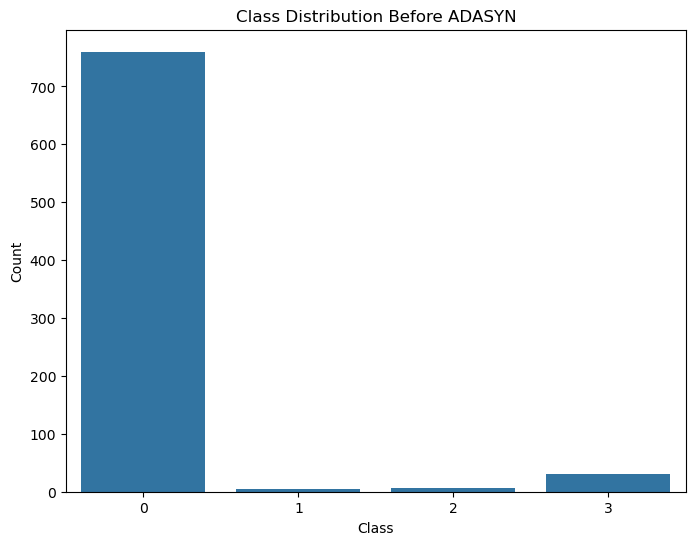

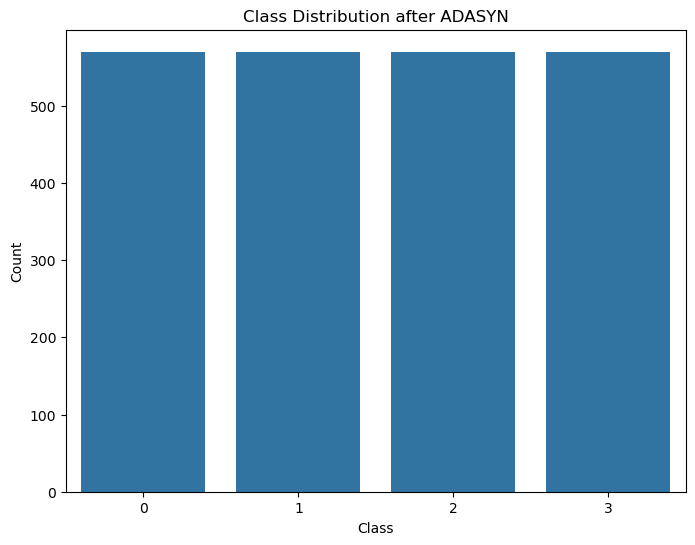

Decision Tree Depth: 15
Number of Leaves: 50
Number of Nodes: 99
Balanced Accuracy Score of Decision Tree Model: 0.9564
Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      0.86      0.63         7

    accuracy                           0.96       200
   macro avg       0.87      0.96      0.90       200
weighted avg       0.98      0.96      0.97       200

Decision Trees - AUC-ROC Score: 0.9618
Confusion Matrix:
[[184   0   0   6]
 [  0   1   0   0]
 [  0   0   2   0]
 [  1   0   0   6]]


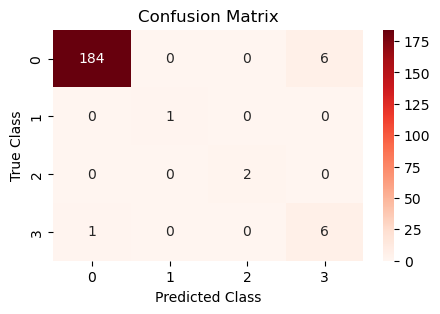

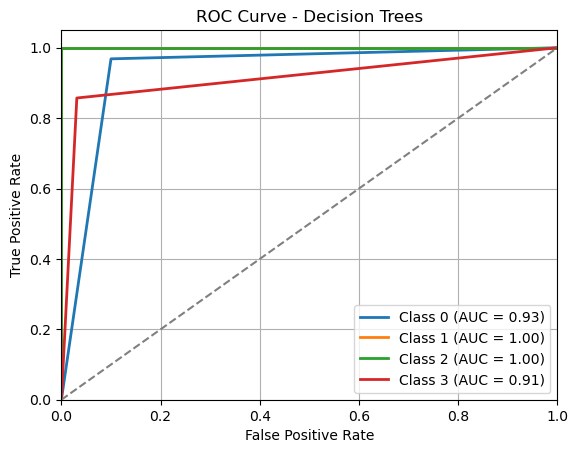

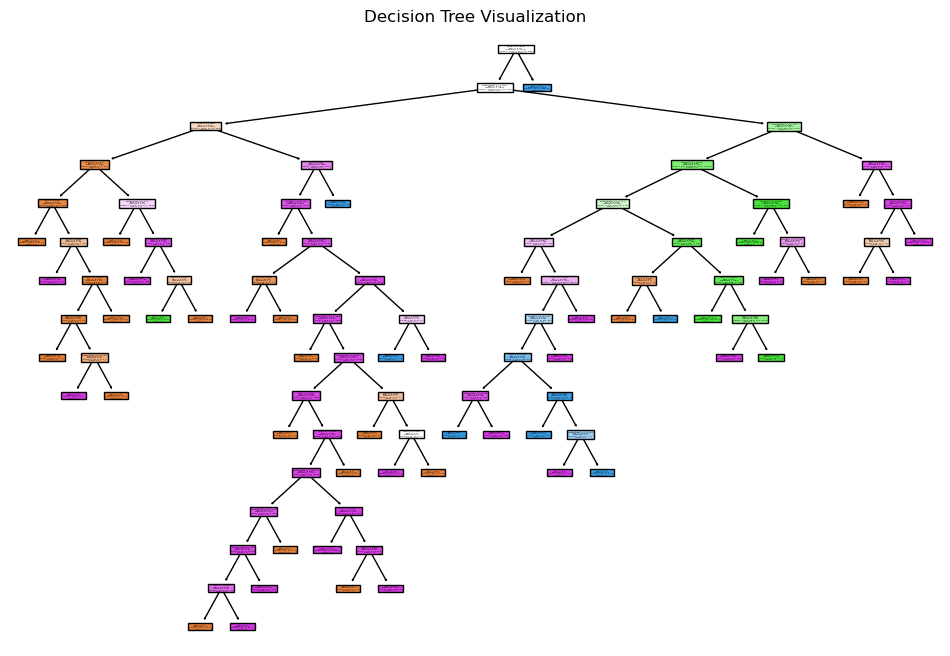

In [59]:
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Visualize class distribution before applying SMOTE
plt.figure(figsize=(8, 6))
sb.countplot(x=relevant_df['alert_encoded'])
plt.title('Class Distribution Before ADASYN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size=0.25, random_state=42, stratify=response_df)

# Addressing class imbalance using ADASYN
adasyn = ADASYN(random_state=42, n_neighbors = 2)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Visualize class distribution before applying SMOTE
plt.figure(figsize=(8, 6))
sb.countplot(x=y_resampled)
plt.title('Class Distribution after ADASYN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Define and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Retrieve Attribute of Parameters
tree_depth = model.get_depth()
num_leaves = model.get_n_leaves()
num_nodes = model.tree_.node_count

print(f"Decision Tree Depth: {tree_depth}")
print(f"Number of Leaves: {num_leaves}")
print(f"Number of Nodes: {num_nodes}")

# Calculate balanced accuracy for the Decision Trees model
balanced_accuracy_DT = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score of Decision Tree Model: {balanced_accuracy_DT:.4f}")

# Calculate Accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the AUC-ROC Score
y_pred_proba = model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Decision Trees - AUC-ROC Score: {auc_roc:.4f}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(response_df), yticklabels=np.unique(response_df))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# Plotting the ROC Curve for multiclass (one vs rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(response_df))
plt.figure()
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i],y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Trees")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Visualizing Decision Tree
plt.figure(figsize=(12, 8))

# Correct class_names to be a list of strings
plot_tree(
    model,
    feature_names=predictors_df.columns,
    class_names=[str(cls) for cls in np.unique(y_resampled)],
    filled=True
)

plt.title("Decision Tree Visualization")
plt.show()

